In [1]:
import pandas as p
import matplotlib.pyplot as mp
import sklearn.model_selection as sk
import numpy as np
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn import svm


In [2]:
%cd C:\Downloads
data=p.read_csv("SVMdataset.csv")    
data.head()

C:\Downloads


,x1,x2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


In [3]:
def plot_fun1(data,t):
  datay0=data[data['y'] == 0]
  datay1=data[data['y'] == 1]
  x1y0=datay0.x1
  x1y1=datay1.x1
  x2y0=datay0.x2
  x2y1=datay1.x2
  mp.scatter(x1y0,x2y0,c="r",label="0",marker="o")
  mp.scatter(x1y1,x2y1,c="b",label="1",marker="x")
  mp.title(t)
  mp.xlabel("x1")
  mp.ylabel("x2")
  mp.legend()
  mp.show()

In [4]:
x2=data.x2
x1=data.x1
y=data.y
dfx=p.DataFrame(x2)
dfx.insert(0,"x1",x1)
x12=dfx
x_train,x_testt, y_train, y_testt = sk.train_test_split(x12,y,train_size=0.6)
x_val,x_test, y_val, y_test = sk.train_test_split(x_testt,y_testt,train_size=0.5)


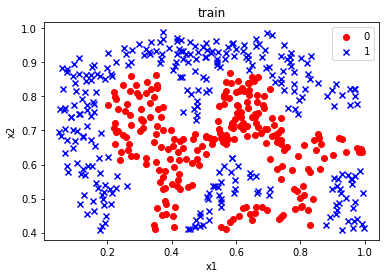

In [5]:
tdf=p.DataFrame(y_train)
tdf.insert(0,"x2",x_train.x2)
tdf.insert(0,"x1",x_train.x1)
plot_fun1(tdf,'train')

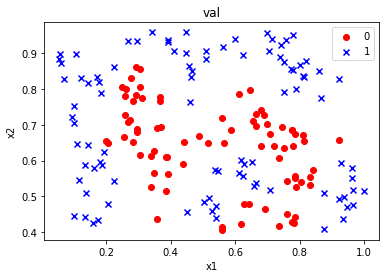

In [6]:
tdf1=p.DataFrame(y_val)
tdf1.insert(0,"x2",x_val.x2)
tdf1.insert(0,"x1",x_val.x1)
plot_fun1(tdf1,'val')

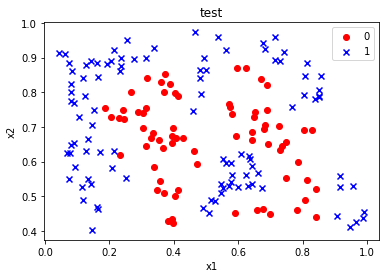

In [7]:
tdf2=p.DataFrame(y_test)
tdf2.insert(0,"x2",x_test.x2)
tdf2.insert(0,"x1",x_test.x1)
plot_fun1(tdf2,'test')

In [8]:
def meshgrid(x0, x1):
  h = 0.02
  x_min, x_max = x0.min() - .01, x0.max() + .01
  y_min, y_max = x1.min() - .01, x1.max() + .01
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  return xx, yy


In [9]:
def contours(zz, clf, xx, yy):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  q = zz.contourf(xx, yy, Z, cmap=mp.cm.coolwarm, alpha=0.8)
  return q


In [10]:
def final_plot(x, y, clf):
  fig, zz = mp.subplots()
  x0, x1 = x.x1, x.x2
  xx, yy = meshgrid(x0, x1)
  contours(zz, clf, xx, yy)
  temp = [x0, x1, y]
  temp = p.concat(temp, axis=1)
  plot_fun1(temp, "")
  plot_confusion_matrix(clf, x, y)


In [11]:
def afpr(x,y):
  y_predict = clf.predict(x)
  accuracy = metrics.accuracy_score(y, y_predict)
  print('accuracy=',accuracy)
  f1_score = metrics.f1_score(y, y_predict)
  print('f1_score=',f1_score)
  precision = metrics.precision_score(y, y_predict)
  print('precision=',precision)
  recall = metrics.recall_score(y, y_predict)
  print('recall=' ,recall)
    

In [12]:
C = 0
f1m = 0
c=0
r=np.ones(1000)
for i in range(1,1001):
    r[c]=i/100
    c=c+1
for i in r:
  model = svm.LinearSVC(C = i)
  clf = model.fit(x_train, y_train.values.ravel())
  y_predict = clf.predict(x_val)
  f1 = metrics.f1_score(y_val, y_predict)
  a = metrics.accuracy_score(y_val, y_predict)
  if f1 > f1m:
    f1m = f1
    C = i

In [13]:
model = svm.LinearSVC(C = C)
clf = model.fit(x_train, y_train.values.ravel())
print('C = ',C)

C =  0.02


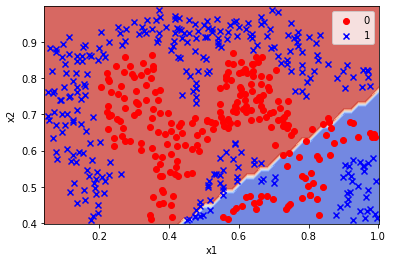

accuracy= 0.562862669245648
f1_score= 0.6852367688022284
precision= 0.5694444444444444
recall= 0.8601398601398601


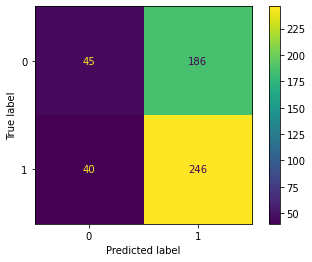

In [14]:
final_plot(x_train, y_train, clf)
afpr(x_train, y_train)

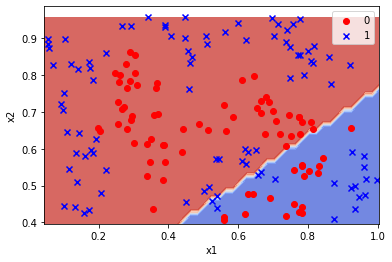

accuracy= 0.5606936416184971
f1_score= 0.6695652173913044
precision= 0.5620437956204379
recall= 0.8279569892473119


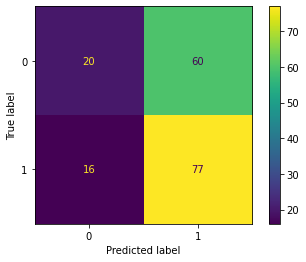

In [15]:
final_plot(x_val, y_val, clf)
afpr(x_val, y_val)

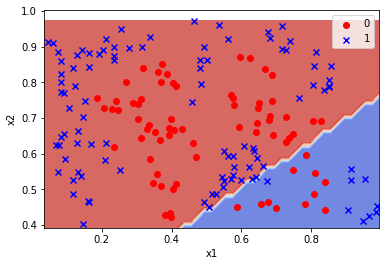

accuracy= 0.5953757225433526
f1_score= 0.7244094488188976
precision= 0.6013071895424836
recall= 0.9108910891089109


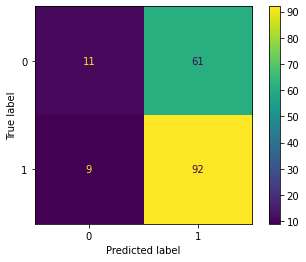

In [16]:
final_plot(x_test, y_test, clf)
afpr(x_test, y_test)